In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
sag_df = pd.read_excel("../data/raw/sag.xlsx")
sag_df = sag_df.drop(columns=['id', 'dataset', 'question_id'])
sag_df.head()

,question,real_answer,answer,score,correct
0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,3.5,0
1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To simulate portions of the desired final prod...,5.0,1
2,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,4.0,1
3,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,Defined in the Specification phase a prototype...,5.0,1
4,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0,0


In [3]:
sag_df['is_correct'] = np.where(sag_df['correct'] == 1, "correct", "wrong")

sag_df['prompt'] = (
    "Question: " + sag_df['question'] + "\n"
    "Reference Answer: " + sag_df['real_answer'] + "\n"
    "Student Answer: " + sag_df['answer'] + "\n"
    "Grading Rubric: 0-5 (where 0 is the lowest score and 5 is the highest).\n"
    "Scores given by experts: " + sag_df['score'].astype(str) + 
    ". Student answer is " + sag_df['is_correct']
)

sag_df['prompt_length'] = sag_df['prompt'].apply(len)
sag_df.head()


,question,real_answer,answer,score,correct,is_correct,prompt,prompt_length
0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,3.5,0,wrong,Question: What is the role of a prototype prog...,492
1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To simulate portions of the desired final prod...,5.0,1,correct,Question: What is the role of a prototype prog...,505
2,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,4.0,1,correct,Question: What is the role of a prototype prog...,419
3,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,Defined in the Specification phase a prototype...,5.0,1,correct,Question: What is the role of a prototype prog...,554
4,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0,0,wrong,Question: What is the role of a prototype prog...,530


In [4]:
sag_df['prompt_length'].describe()

count    2558.000000
mean      418.944097
std       114.996830
min       230.000000
25%       329.000000
50%       405.000000
75%       489.000000
max      1398.000000
Name: prompt_length, dtype: float64

In [5]:
sag_df.shape

(2558, 8)

## Score distribution plot

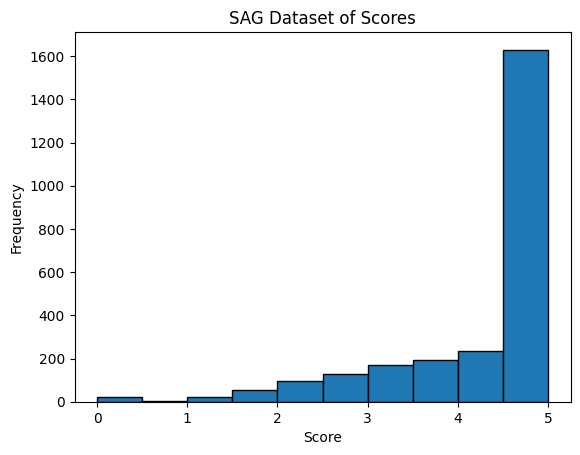

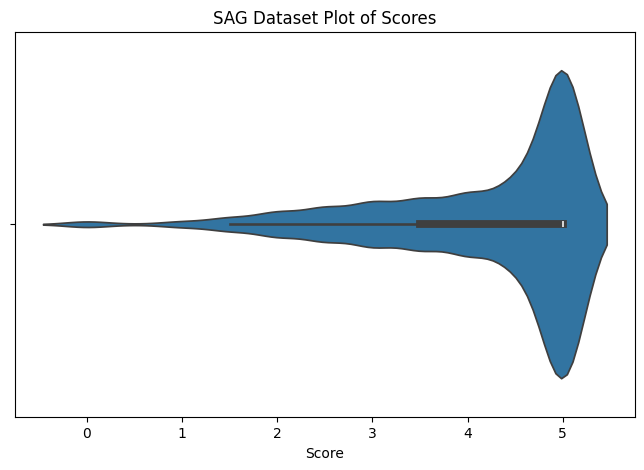

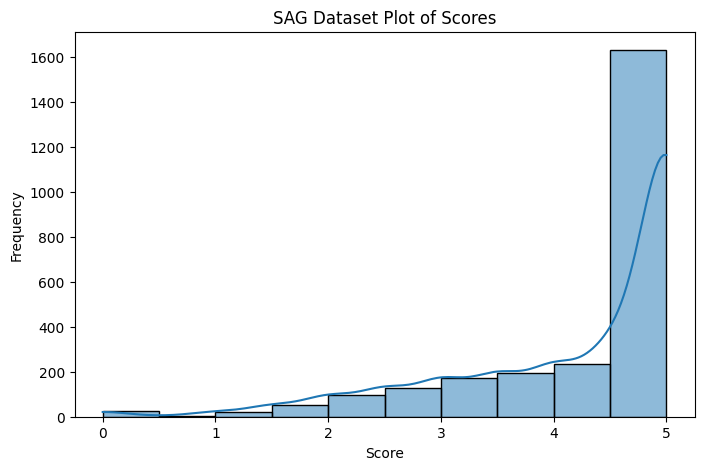

In [6]:
plt.hist(sag_df['score'], bins=10, edgecolor='black')
plt.title('SAG Dataset of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 5))
sns.violinplot(x=sag_df['score'])
plt.title('SAG Dataset Plot of Scores')
plt.xlabel('Score')
plt.show()
plt.figure(figsize=(8, 5))
sns.histplot(sag_df['score'], bins=10, kde=True, edgecolor='black')
plt.title('SAG Dataset Plot of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

## Input Length Plot

In [7]:
sag_df['q_length'] = sag_df['question'].apply(len)
sag_df['r_length'] = sag_df['real_answer'].apply(len)
sag_df['a_length'] = sag_df['answer'].apply(len)
print("deskripsi question")
print(sag_df['q_length'].describe())

deskripsi question
count    2558.000000
mean       59.656372
std        28.267902
min        15.000000
25%        42.000000
50%        58.000000
75%        77.000000
max       160.000000
Name: q_length, dtype: float64


In [8]:
print("\ndeskripsi reference answer")
print(sag_df['r_length'].describe())
print("\ndeskripsi student answer")
print(sag_df['a_length'].describe())


deskripsi reference answer
count    2558.000000
mean       81.866302
std        56.143331
min         4.000000
25%        34.000000
50%        70.000000
75%       136.500000
max       260.000000
Name: r_length, dtype: float64

deskripsi student answer
count    2558.000000
mean      103.960125
std        81.949038
min         1.000000
25%        50.000000
50%        87.000000
75%       138.000000
max       951.000000
Name: a_length, dtype: float64


### Question plot

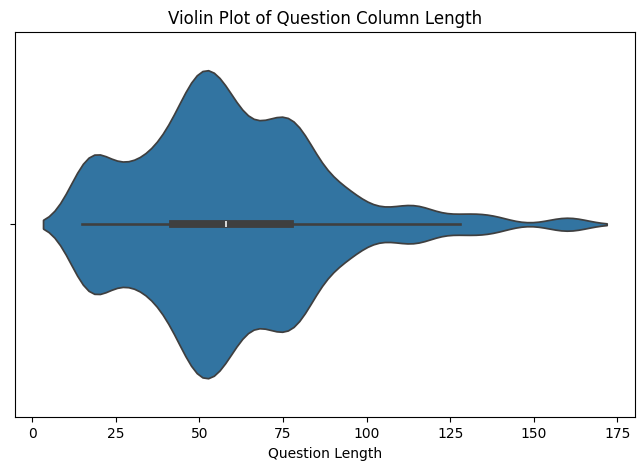

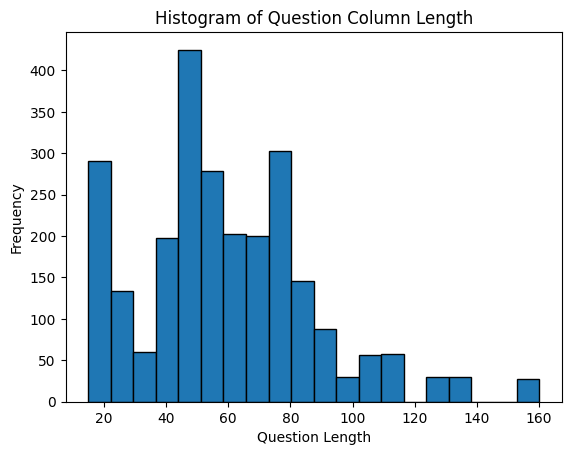

In [9]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=sag_df['q_length'])
plt.title('Violin Plot of Question Column Length')
plt.xlabel('Question Length')
plt.show()
plt.hist(sag_df['q_length'], bins=20, edgecolor='black')
plt.title('Histogram of Question Column Length')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.show()

### Reference answer plot

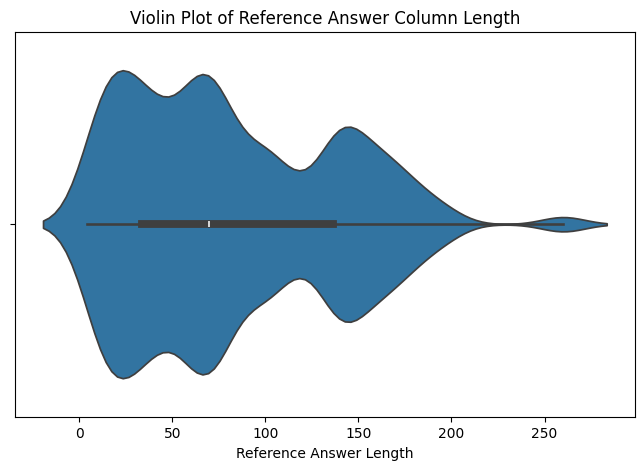

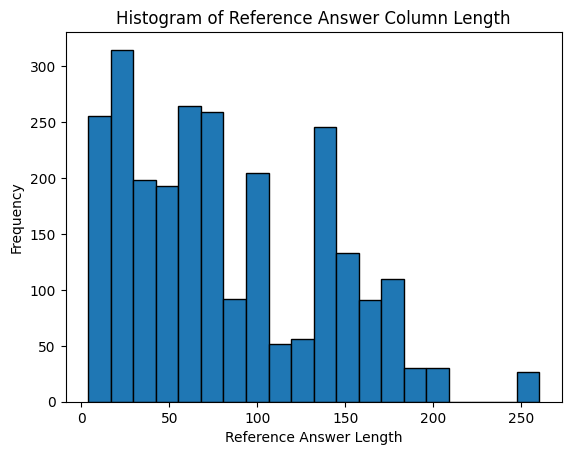

In [10]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=sag_df['r_length'])
plt.title('Violin Plot of Reference Answer Column Length')
plt.xlabel('Reference Answer Length')
plt.show()
plt.hist(sag_df['r_length'], bins=20, edgecolor='black')
plt.title('Histogram of Reference Answer Column Length')
plt.xlabel('Reference Answer Length')
plt.ylabel('Frequency')
plt.show()

### Student answer plot

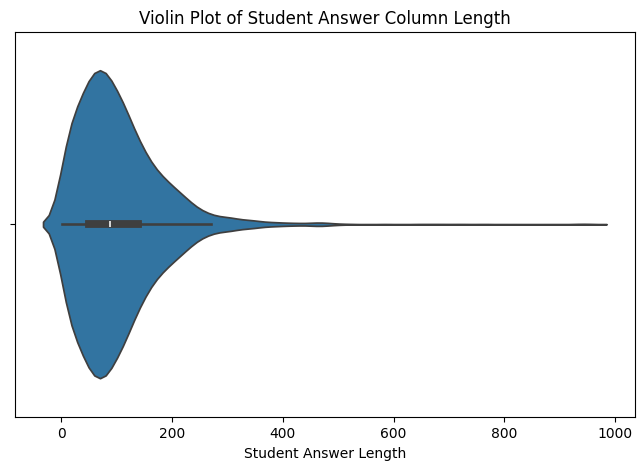

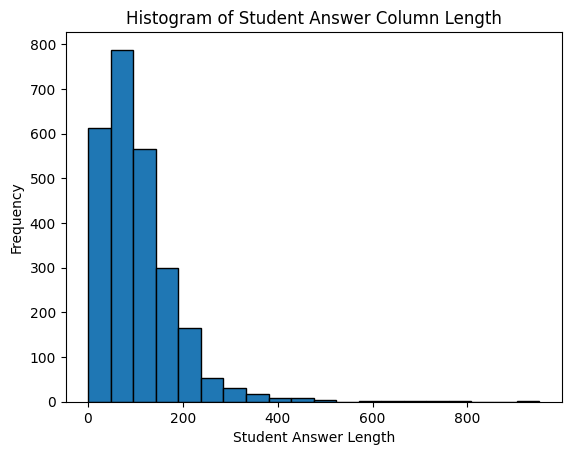

In [11]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=sag_df['a_length'])
plt.title('Violin Plot of Student Answer Column Length')
plt.xlabel('Student Answer Length')
plt.show()
plt.hist(sag_df['a_length'], bins=20, edgecolor='black')
plt.title('Histogram of Student Answer Column Length')
plt.xlabel('Student Answer Length')
plt.ylabel('Frequency')
plt.show()

In [12]:
sag_df.head()

,question,real_answer,answer,score,correct,is_correct,prompt,prompt_length,q_length,r_length,a_length
0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,3.5,0,wrong,Question: What is the role of a prototype prog...,492,59,70,191
1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To simulate portions of the desired final prod...,5.0,1,correct,Question: What is the role of a prototype prog...,505,59,70,202
2,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,4.0,1,correct,Question: What is the role of a prototype prog...,419,59,70,116
3,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,Defined in the Specification phase a prototype...,5.0,1,correct,Question: What is the role of a prototype prog...,554,59,70,251
4,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0,0,wrong,Question: What is the role of a prototype prog...,530,59,70,229


In [13]:
sag_df = sag_df.drop(columns=['prompt', 'prompt_length', 'r_length', 'a_length', 'correct', 'is_correct', 'q_length'])
sag_df = sag_df.rename(columns={'real_answer':'reference_answer'})
print(sag_df.head())
sag_df.to_csv('data/sag.csv', index=False)

                                            question  \
0  What is the role of a prototype program in pro...   
1  What is the role of a prototype program in pro...   
2  What is the role of a prototype program in pro...   
3  What is the role of a prototype program in pro...   
4  What is the role of a prototype program in pro...   

                                    reference_answer  \
0  To simulate the behaviour of portions of the d...   
1  To simulate the behaviour of portions of the d...   
2  To simulate the behaviour of portions of the d...   
3  To simulate the behaviour of portions of the d...   
4  To simulate the behaviour of portions of the d...   

                                              answer  score  
0  High risk problems are address in the prototyp...    3.5  
1  To simulate portions of the desired final prod...    5.0  
2  A prototype program simulates the behaviors of...    4.0  
3  Defined in the Specification phase a prototype...    5.0  
4  It is used to